# Naive Bayes Classification

## Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas import DataFrame, Series
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

## Load the dataset mushrooms

In [2]:
df = pd.read_csv('../KNN/Data-Mushroom/mushrooms.csv', skiprows=2)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data exploration

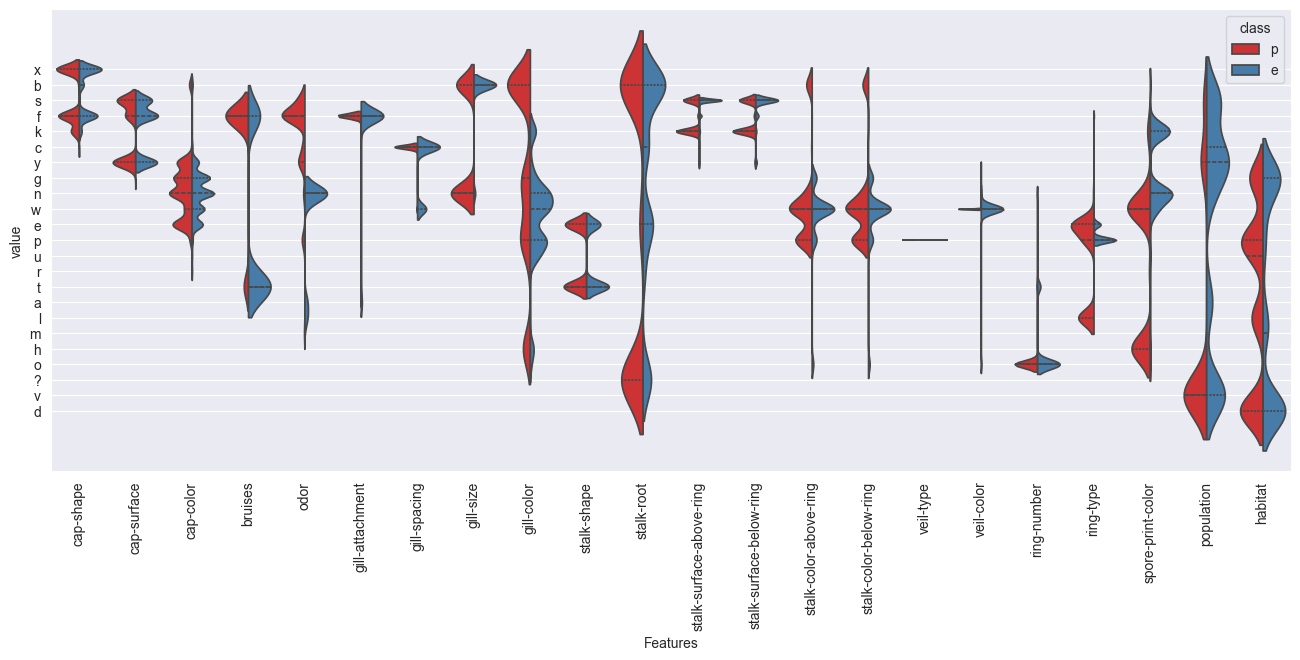

In [3]:
df_div = pd.melt(df, "class", var_name="Features")
fig, ax = plt.subplots(figsize=(16, 6))

p = sns.violinplot(ax=ax, x="Features", y="value", hue="class", split=True, data=df_div, inner='quartile',
                   palette='Set1', density_norm='count')
tick_locations = ax.get_xticks()

# Set the tick locations explicitly
ax.set_xticks(tick_locations)

x_columns = [col for col in df.columns if col != 'class']
# Now set the tick labels with rotation
ax.set_xticklabels(list(x_columns), rotation=90)

plt.show()

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
y_column = 'class'
for feature in df.columns:
    if feature == y_column:
        continue

    value_counts = df[feature].value_counts()
    if len(value_counts) > 1:
        x_columns.append(feature)
print(len(x_columns))
print("Removed columns:")
print(set(df.columns.tolist()) - set(x_columns))

43
Removed columns:
{'class'}


In [6]:
from numpy import log2


def data_entropy(column_data: Series):
    probabilities = column_data.value_counts(normalize=True)
    return -sum(probabilities * log2(probabilities))

Zero entropy columns: ['veil-type']


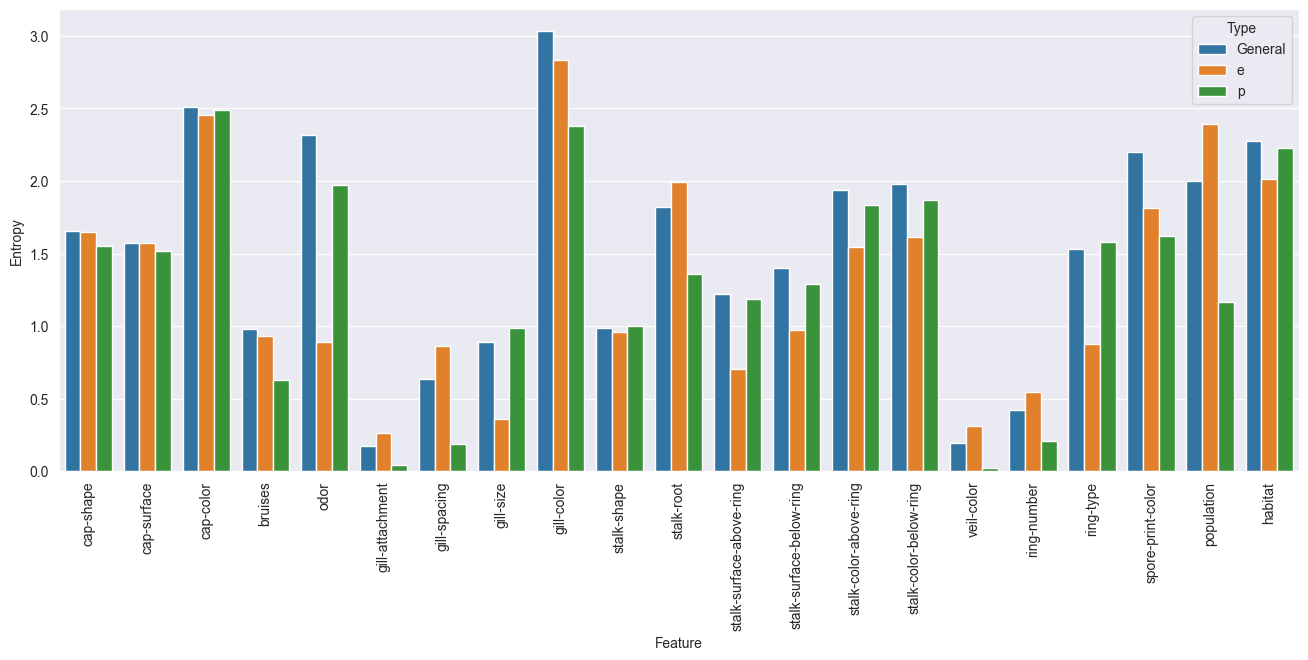

In [7]:
all_data_entropy: Series = df.drop(columns=[y_column]).apply(lambda col: data_entropy(col))
zero_entropy_columns = all_data_entropy[all_data_entropy <= 0].index.tolist()
print(f"Zero entropy columns: {zero_entropy_columns}")

all_data_entropy.drop(index=zero_entropy_columns, inplace=True)
# Create a DataFrame for plotting
entropy_df = pd.DataFrame({
    'Feature': all_data_entropy.index,
    'Entropy': all_data_entropy.values,
    'Type': 'General'
})

# Calculate entropy for each class
entropies = {}

for c_i, x in df.groupby(y_column):
    class_entropy: Series = x.drop(columns=[y_column]).apply(lambda col: data_entropy(col))
    class_entropy.drop(index=zero_entropy_columns, inplace=True)
    class_entropy_df = pd.DataFrame({
        'Feature': class_entropy.index,
        'Entropy': class_entropy.values,
        'Type': c_i
    })
    entropies[c_i] = class_entropy
    entropy_df = pd.concat([entropy_df, class_entropy_df])

# Plot using seaborn with hue
plt.figure(figsize=(16, 6))
sns.barplot(data=entropy_df, x='Feature', y='Entropy', hue='Type')
plt.xticks(rotation=90)
plt.show()

cap-shape: 1.651 vs 1.554 diff: 0.097 change: 5.877%
bruises: 0.930 vs 0.633 diff: 0.298 change: 31.996%
odor: 0.892 vs 1.974 diff: 1.082 change: 54.816%
gill-attachment: 0.268 vs 0.042 diff: 0.225 change: 84.185%
gill-spacing: 0.862 vs 0.187 diff: 0.675 change: 78.279%
gill-size: 0.360 vs 0.987 diff: 0.627 change: 63.505%
gill-color: 2.833 vs 2.378 diff: 0.455 change: 16.066%
stalk-root: 1.994 vs 1.359 diff: 0.635 change: 31.849%
stalk-surface-above-ring: 0.705 vs 1.186 diff: 0.481 change: 40.594%
stalk-surface-below-ring: 0.977 vs 1.289 diff: 0.312 change: 24.182%
stalk-color-above-ring: 1.544 vs 1.832 diff: 0.288 change: 15.701%
stalk-color-below-ring: 1.615 vs 1.868 diff: 0.253 change: 13.533%
veil-color: 0.313 vs 0.021 diff: 0.292 change: 93.231%
ring-number: 0.545 vs 0.207 diff: 0.337 change: 61.933%
ring-type: 0.880 vs 1.580 diff: 0.700 change: 44.308%
spore-print-color: 1.817 vs 1.621 diff: 0.196 change: 10.800%
population: 2.392 vs 1.167 diff: 1.225 change: 51.211%
habitat: 2.

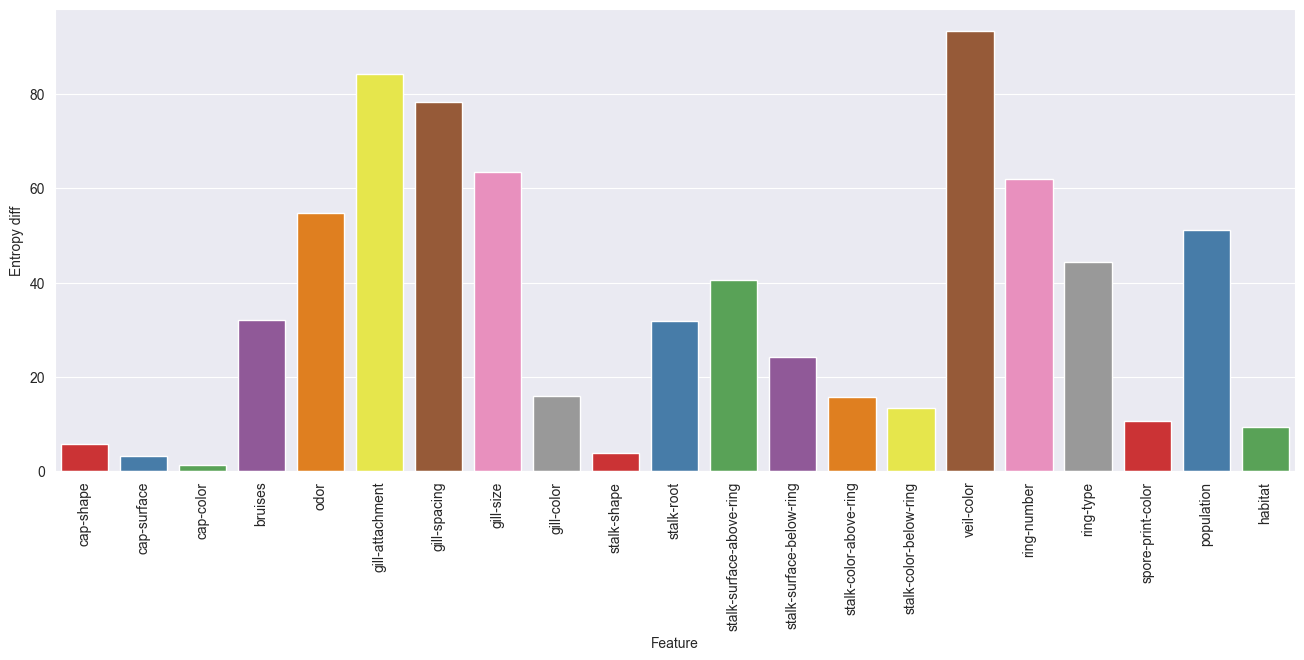

In [8]:
data = []
filtered_x_columns = []

for column in all_data_entropy.index:
    c_e_entropy = entropies['e'][column]
    c_p_entropy = entropies['p'][column]
    diff = abs(c_e_entropy - c_p_entropy)
    change = 0 if max(c_e_entropy, c_p_entropy) <= 0 else diff / max(c_e_entropy, c_p_entropy)
    # change = 1 - change
    # change = 1/ change
    data.append({
        'Feature': column,
        'Entropy diff': change * 100
    })
    if change < .05:
        continue
    
    filtered_x_columns.append(column)
    print(f"{column}: {c_e_entropy:.3f} vs {c_p_entropy:.3f} diff: {diff:.3f} change: {change * 100:.3f}%")

plt.figure(figsize=(16, 6))
sns.barplot(data=pd.DataFrame(data), x='Feature', y='Entropy diff', hue='Feature', legend=False, palette='Set1')
plt.xticks(rotation=90)
plt.show()

In [9]:
trowed_columns = set(x_columns) - set(filtered_x_columns)
print(f"Old columns size: {len(x_columns)}")
print(f"Dropped columns ({len(trowed_columns)}): {trowed_columns}")
print(f"New columns size: {len(filtered_x_columns)}")
print(f"New features set: {filtered_x_columns}")

Old columns size: 43
Dropped columns (4): {'cap-surface', 'cap-color', 'stalk-shape', 'veil-type'}
New columns size: 18
New features set: ['cap-shape', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


## Prepare the dataset

In [10]:
label_encoder = LabelEncoder()
X = df[filtered_x_columns].apply(label_encoder.fit_transform)
y = df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Train the model

In [11]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Evaluate the model

In [12]:
y_pred = classifier.predict(X_test)
print(f"Used features: {filtered_x_columns}")

Used features: ['cap-shape', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [13]:
print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           e      0.932     0.902     0.917       847
           p      0.897     0.928     0.912       778

    accuracy                          0.914      1625
   macro avg      0.914     0.915     0.914      1625
weighted avg      0.915     0.914     0.914      1625



## Confusion matrix

A confusion matrix is a table used to evaluate the performance of a classification model. It compares the actual target values with the model's predictions. Here's a brief explanation of the axes:  
- X-axis (Columns): Represents the predicted classes.
- Y-axis (Rows): Represents the actual classes.
Each cell in the matrix shows the number of instances that fall into the corresponding actual vs. predicted class. For example:  
- True Positives (TP): Correctly predicted positive instances (top-left cell if positive class is the first).
- True Negatives (TN): Correctly predicted negative instances (bottom-right cell if negative class is the second).
- False Positives (FP): Incorrectly predicted positive instances (top-right cell if positive class is the first).
- False Negatives (FN): Incorrectly predicted negative instances (bottom-left cell if negative class is the second).


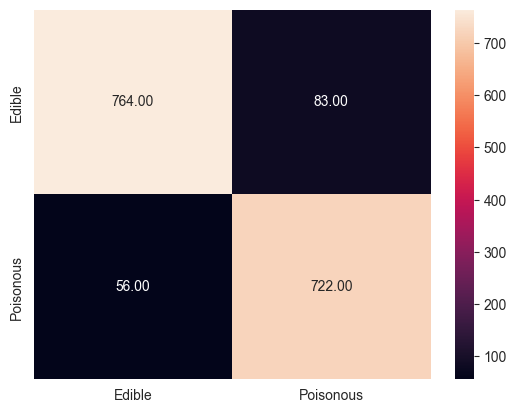

In [14]:
results = confusion_matrix(y_test, y_pred, labels=['e', 'p'])

# results = results / results.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(results, annot=True, fmt=".2f")
labels = ['Edible','Poisonous']
plt.xticks([0.5, 1.5], labels)
plt.yticks([0.5, 1.5], labels)
plt.show()

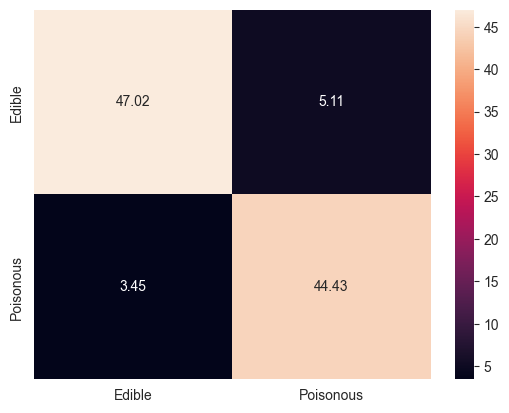

In [15]:
results = confusion_matrix(y_test, y_pred, labels=['e', 'p'])

results = results / results.sum() * 100
sns.heatmap(results, annot=True, fmt=".2f")
labels = ['Edible','Poisonous']
plt.xticks([0.5, 1.5], labels)
plt.yticks([0.5, 1.5], labels)
plt.show()

In [16]:
results = confusion_matrix(y_test, y_pred, labels=['e', 'p'])
results

array([[764,  83],
       [ 56, 722]])

In [17]:
edible_precision = results[0][0]/(results[0][0] + results[1][0]) * 100
poisonous_precision = results[1][1]/(results[0][1] + results[1][1]) * 100
print(f"Edible precision: {edible_precision:.2f}%")
print(f"Poisonous precision: {poisonous_precision:.2f}%")

Edible precision: 93.17%
Poisonous precision: 89.69%
